In [146]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [147]:
def kernel (point,xmat,k):
    m,n=np.shape(xmat)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff = point-X[j]
        weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [148]:
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [149]:
def localWeightRegression(xmat,ymat,k):
    m,n=np.shape(xmat)
    ypred=np.zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [150]:
def graphPlot(X,ypred):
    sortindex=X[:,1].argsort(0)
    xsort=X[sortindex][:,0]
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.scatter(bill,tip,color='green    ')
    ax.plot(xsort[:,1],ypred[sortindex],color='#cfaafc',linewidth=5)
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.show()

In [151]:
data=pd.read_csv('data9.csv')
bill=np.array(data.total_bill)
tip=np.array(data.tip)

In [152]:
mbill=np.mat(bill)
mtip=np.mat(tip)
m=np.shape(mbill)[1]
one=np.mat(np.ones(m))
X=np.hstack((one.T,mbill.T))

/tmp/ipykernel_3882/3597747533.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j,j]=np.exp(diff*diff.T/(-2.0*k**2))
/tmp/ipykernel_3882/2853822937.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)


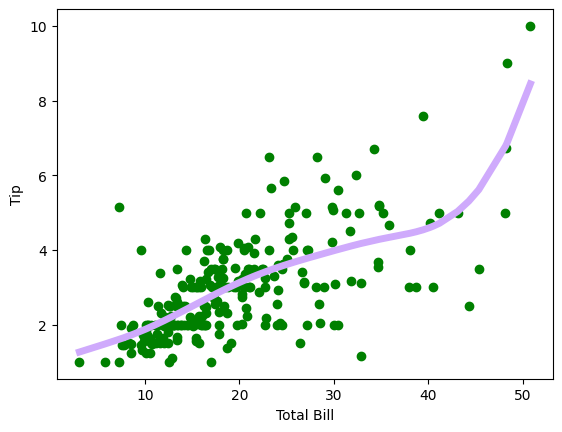

In [154]:
ypred=localWeightRegression(X, mtip, 5)
graphPlot(X,ypred)